<a href="https://colab.research.google.com/github/tsallpin/starter-gatsby-tiago/blob/main/Atividade_C%C3%A1lculo_N%C3%BAmerico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade de Cálculo Númerico**

Aluna: Mariana Marques Ferreira - 20190022112 \\
Professora: Tatiana Simões

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# **Questão 1**

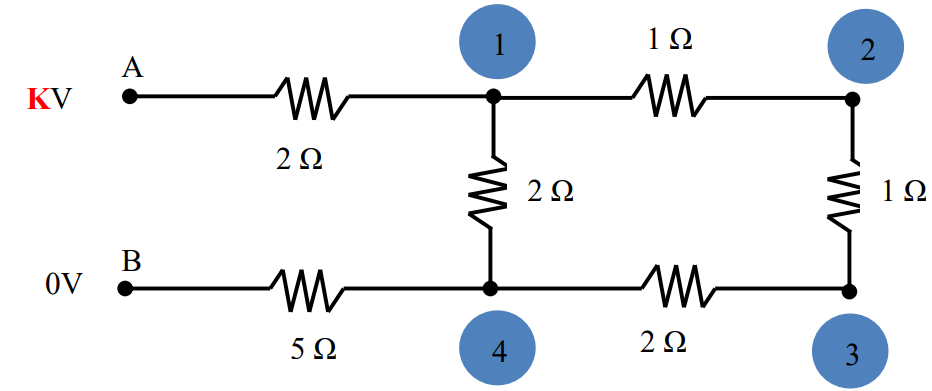

Aplicando a Lei de Kirchorff dos Nós para o circuito acima, encontramos as 
seguintes equações: 

**Nó 1:** 

\begin{align} 
  \frac{V1 - 112}{2} + \frac{V1 - V4}{2} + \frac{V1 - V2}{1} = 0\\
\end{align}

\begin{align} 
4 \cdot V1 - 2 \cdot V2 - V4 = 112\\
\end{align}

**Nó 2:** 

\begin{align} 
  \frac{V2 - V1}{1} + \frac{V2 - V3}{1} = 0\\
\end{align}

\begin{align} 
-V1 + 2 \cdot V2 - V3 = 0\\
\end{align}

**Nó 3:** 

\begin{align} 
  \frac{V3 - V2}{1} + \frac{V3 - V4}{2} = 0\\
\end{align}

\begin{align} 
-2 \cdot V2 + 3 \cdot V3 - V4 = 0\\
\end{align}


**Nó 4:** 

\begin{align} 
  \frac{V4 - V1}{2} + \frac{V4 - V3}{2} + \frac{V4}{5}= 0\\
\end{align}

\begin{align} 
  -5 \cdot V1 - 5 \cdot V3 + 12 \cdot V4 = 0\\
\end{align}

Assim, podemos escrever as equações a cima na forma matricial: 

$\begin{bmatrix}
4 & -2 & 0 & -1 \\
-1 & 2 & -1 & 0 \\
0 & -2 & 3 & -1 \\
-5 & 0 & -5 & 12\\
\end{bmatrix}
\begin{bmatrix}
V1 \\
V2 \\
V3 \\
V4 \\
\end{bmatrix} 
=
\begin{bmatrix}
112 \\
0 \\
0 \\
0 \\
\end{bmatrix}$


Assim, a solução exata para este sistema de equação é: 


In [ ]:
# Matriz A
A = np.array([[4.0,-2.0, 0.0, -1.0],[-1.0, 2.0, -1.0 ,0.0],[0.0,-2.0, 3.0, -1.0],[-5.0, 0.0, -5.0, 12.0]]) 

# Matriz b
b = np.array([112, 0,0,0]) # Matriz com valores independentes

print(np.linalg.solve(A, b))

[85.12 80.64 76.16 67.2 ]


Assim, a solução é:  

\begin{align}
  V1 = 85.12 V \\
  V2 = 80.64 V \\
  V3 = 76.16 V \\
  V4 = 67.20 V \\
\end{align}

**Método direto de Gauss com pivoteamento**




In [ ]:
Ap = np.array(A)
bp = np.array(b)

# Tamanho da matriz Ap
m, n = Ap.shape 

for i in range(m): 
  ind_maximo = np.argmax(np.abs(Ap[i:, i]))
  aux1 = np.array(Ap[ind_maximo+i, :])
  Ap[ind_maximo + i, :] = np.array(Ap[i, :])
  Ap[i, :] = aux1 

  aux2 = np.array(bp[ind_maximo+i])
  bp[ind_maximo + i] = np.array(bp[i])
  bp[i] = aux2

  for j in range(i+1, n):
    m = Ap[j, i]/Ap[i, i]
    Ap[j, :] = Ap[j, :] - m*Ap[i, :]
    bp[j] = bp[j] - m*bp[i]

  print(Ap) 
  print(bp) 


[[-5.   0.  -5.  12. ]
 [ 0.   2.   0.  -2.4]
 [ 0.  -2.   3.  -1. ]
 [ 0.  -2.  -4.   8.6]]
[  0   0   0 112]
[[-5.   0.  -5.  12. ]
 [ 0.   2.   0.  -2.4]
 [ 0.   0.   3.  -3.4]
 [ 0.   0.  -4.   6.2]]
[  0   0   0 112]
[[-5.    0.   -5.   12.  ]
 [ 0.    2.    0.   -2.4 ]
 [ 0.    0.   -4.    6.2 ]
 [ 0.    0.    0.    1.25]]
[  0   0 112  84]
[[-5.    0.   -5.   12.  ]
 [ 0.    2.    0.   -2.4 ]
 [ 0.    0.   -4.    6.2 ]
 [ 0.    0.    0.    1.25]]
[  0   0 112  84]


Assim podemos escrever o sistema de equação da seguinte maneira: 

$\begin{bmatrix}
-5.0 & 0 & -5 & 12.0 \\
0 & 2.0 & 0 & -2.4 \\
0 & 0 & -4 & 6.2 \\
0 & 0 & 0 & 1.25\\
\end{bmatrix}
\begin{bmatrix}
V1 \\
V2 \\
V3 \\
V4 \\
\end{bmatrix} 
=
\begin{bmatrix}
0 \\
0 \\
112 \\
84 \\
\end{bmatrix}$

E assim temos que $V4$ é :  

\begin{align} 
1.25 \cdot V4 = 84 → V4 = \frac{84}{1.25} = 67.20 V\\
\end{align}

E para $V3$: 

\begin{align} 
-4 \cdot V3 + 6.2 \cdot V4 = 112 → V3 = \frac{112 - 6.2 \cdot V4}{-4} = \frac{112 - 6.2 \cdot 67.20}{-4} = 76.16 V\\
\end{align}

E $V2$: 

\begin{align} 
2 \cdot V2 -2.4 \cdot V4 = 0 → V2 = \frac{2.4 \cdot V4}{2} = 80.64 V\\
\end{align}

Por fim, para $V1$: 

\begin{align} 
-5 \cdot V1 -5 \cdot V3 + 12 \cdot V4 = 0 → V1 = \frac{5 \cdot V3 - 12 \cdot V4}{-5}\\ 
V1 = \frac{5 \cdot 76.16 - 12 \cdot 67.20}{-5} = 85.12 V\\
\end{align}

Os resultados encontrados utilizando o método direto de Gauss com pivoteamento é os mesmos valores para a solução exata do sistema. Dessa forma, o erro relativo é de $0\%$. 



E para o método o **método iterativo de Gauss-Jacobi**, temos as seguintes equações: 

**Nó 1:** 

\begin{align} 
V1 = \frac{112 + 2 \cdot V2 + V4}{4} = \frac{1}{2} \cdot V2 + \frac{1}{4} \cdot V4 + 28\\
\end{align}

**Nó 2:** 

\begin{align} 
V2 = \frac{V1 + V3}{2} = \frac{1}{2} \cdot V1 + \frac{1}{2} \cdot V3\\
\end{align}

**Nó 3:** 

\begin{align} 
V3 = \frac{2 \cdot V2 + V4}{3} = \frac{2}{3} \cdot V2 + \frac{1}{3} \cdot V4\\
\end{align}


**Nó 4:** 

\begin{align} 
V4 = \frac{5 \cdot V1 + 5 \cdot V3}{12} = \frac{5}{12} \cdot V1 + \frac{5}{12} \cdot V3\\
\end{align}

Sendo assim, o vetor das soluções $(S)$ é aplicado em todas as equações de incógnitas isoladas e a cada iteração o vetor (operador solução) é
atualizado de acordo com $V1$, $V2$, $V3$ e $V4$ encontrados na iteração anterior. 

In [ ]:
# Tamanho da matriz A
m, n = A.shape 

# Inicia x e y como matrizes nulas:
x = np.zeros((m, n))
y = np.zeros(n)

# Preenche as matrizes x e y 
for i in range(0, m):
 x[i,:] = (-1) * (A[i,:]/A[i,i]) # Divide pelo pivô
 x[i,i] = 0 # Zera a diagonal principal
 y[i] = b[i]/A[i,i]

O vetor das soluções foi iniciado com os seguintes valores: 

$X_0 = \begin{bmatrix} 28 \\ 0 \\ 0 \\ 0 \\ \end{bmatrix}$

E foi adotado uma precisão de $10^{-5}$. 

In [ ]:
# Método Iterativo Gauss Jacobi
S = y
precisao = 10**(-4)
i = 0

while True:
  sol_anterior = S
  S = np.dot(x, S) + y
  print("Iteracao " f"{i}" " : " f"{S}")

  teste1 = np.max(S - sol_anterior)/np.max(S) # Critério de Parada
  i += 1
  if(teste1 < precisao):
    break

Iteracao 0 : [28.         14.          0.         11.66666667]
Iteracao 1 : [37.91666667 14.         13.22222222 11.66666667]
Iteracao 2 : [37.91666667 25.56944444 13.22222222 21.30787037]
Iteracao 3 : [46.11168981 25.56944444 24.14891975 21.30787037]
Iteracao 4 : [46.11168981 35.13030478 24.14891975 29.27525399]
Iteracao 5 : [52.88396589 35.13030478 33.17862118 29.27525399]
Iteracao 6 : [52.88396589 43.03129354 33.17862118 35.85941128]
Iteracao 7 : [58.48049959 43.03129354 40.64066612 35.85941128]
Iteracao 8 : [58.48049959 49.56058285 40.64066612 41.30048571]
Iteracao 9 : [63.10541285 49.56058285 46.80721714 41.30048571]
Iteracao 10 : [63.10541285 54.956315   46.80721714 45.79692916]
Iteracao 11 : [66.92738979 54.956315   51.90318639 45.79692916]
Iteracao 12 : [66.92738979 59.41528809 51.90318639 49.51274007]
Iteracao 13 : [70.08582906 59.41528809 56.11443875 49.51274007]
Iteracao 14 : [70.08582906 63.10013391 56.11443875 52.58344492]
Iteracao 15 : [72.69592818 63.10013391 59.59457091

In [ ]:
print("Iteracao " f"{i}" " : " f"{S}")

Iteracao 79 : [85.0863502  80.6007419  76.1151336  67.16728492]


Com isso, temos que os valores obtidos com o método de Gauss-Jacobi são:

\begin{align}
  V1 = 85.0864 V \\
  V2 = 80.6007 V \\
  V3 = 76.1151 V \\
  V1 = 67.1673 V \\
\end{align}

Comparando os resultados obtidos com o método de Gauss-Jacobi com os valores exatos, através do Erro Relativo $(E_r)$, temos: 


\begin{align}
  E_r\{V1\} = \frac{|85.12 - 85.0864|}{|85.12|} \cdot 100\% = 0,039 \%\\
  E_r\{V2\} = \frac{|80.64 - 80.6007|}{|83.60|} \cdot 100\% = 0,048 \%\\
  E_r\{V3\} = \frac{|76.16 - 76.1151|}{|76.16|} \cdot 100\% = 0,059 \%\\
  E_r\{V4\} = \frac{|67.20 - 67.1673|}{|67.20|} \cdot 100\% = 0,049 \%\\
\end{align}

Com isso, notamos que o método de Gauss-Jacobi retornou bons resultados para um total de 79 iterações, uma vez que, o erro relativo para $V1$, $V2$, $V3$ e $V4$ foram inferior a $0,06 \%$.



# **Questão 02**

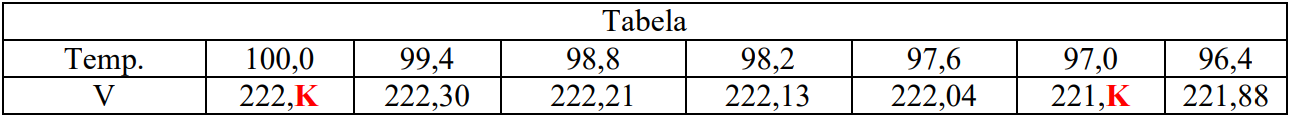

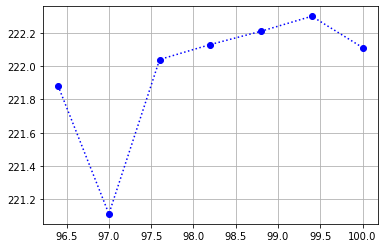

In [ ]:
temp = np.array([100.0, 99.4, 98.8, 98.2, 97.6, 97.0, 96.4])
v = np.array([222.112, 222.300, 222.210, 222.130, 222.040, 221.112, 221.880])

plt.plot(temp, v, 'bo')
plt.plot(temp, v, 'k:', color='blue')
plt.grid(True)
plt.show()

**Interpolação Polinomial - Método de Lagrange**

Sabendo que o polinômio de Lagrange é definido como:

\begin{align} 
  p(x) = \sum_{i=0}^n{L_i(x) \cdot f(x_i)}\\
\end{align}

onde 

\begin{align}
  L_i(x)=\prod_{j=0\\ j\neq i}^{n} = \frac{x - x_j}{x_i - x_j}\\
\end{align}

Conforme os dados na tabela temos que $n=6$. Logo,

\begin{align} 
  p(x) = \sum_{i=0}^6{L_i(x) \cdot f(x_i)}\\
\end{align}

E, por sua vez, temos que o polinômio de Lagrange é: 

\begin{align} 
p(x) = L_0(x) \cdot 222.112 + L_1(x) \cdot 222.300 + L_2(x) \cdot 222.210
+ L_3(x) \cdot 222.130 + L_4(x) \cdot 222.040 + L_5(x) \cdot 221.112 + L_6(x) \cdot 221.880 \\
\end{align}


In [ ]:
for i in range(len(temp)):
  str = " "
  m = 1
  for j in range(len(temp)):
    if j != i:
      str = str + "(x - " f"{temp[j]}" ")"
      m = np.round(m*(temp[i] - temp[j]), 4) # aproximando em 4 casas decimais
    
  print("L_" f"{i}" "(x) =" f"{str}" "/" f"{m}" "\n")

L_0(x) = (x - 99.4)(x - 98.8)(x - 98.2)(x - 97.6)(x - 97.0)(x - 96.4)/33.5923

L_1(x) = (x - 100.0)(x - 98.8)(x - 98.2)(x - 97.6)(x - 97.0)(x - 96.4)/-5.5986

L_2(x) = (x - 100.0)(x - 99.4)(x - 98.2)(x - 97.6)(x - 97.0)(x - 96.4)/2.2394

L_3(x) = (x - 100.0)(x - 99.4)(x - 98.8)(x - 97.6)(x - 97.0)(x - 96.4)/-1.6796

L_4(x) = (x - 100.0)(x - 99.4)(x - 98.8)(x - 98.2)(x - 97.0)(x - 96.4)/2.2394

L_5(x) = (x - 100.0)(x - 99.4)(x - 98.8)(x - 98.2)(x - 97.6)(x - 96.4)/-5.5987

L_6(x) = (x - 100.0)(x - 99.4)(x - 98.8)(x - 98.2)(x - 97.6)(x - 97.0)/33.5923



Assim, temos os seguintes polinômios de Lagrange: 

\begin{align}
  L_0(x) = \frac{(x - 99.4)(x - 98.8)(x - 98.2)(x - 97.6)(x - 97.0)(x - 96.4)}{33.5923}\\
  \\
\end{align}

\begin{align}
  L_1(x) = \frac{(x - 100.0)(x - 98.8)(x - 98.2)(x - 97.6)(x - 97.0)(x - 96.4)}{-5.5986}\\
  \\
\end{align}

\begin{align}
  L_2(x) = \frac{(x - 100.0)(x - 99.4)(x - 98.2)(x - 97.6)(x - 97.0)(x - 96.4)}{2.2394}\\
  \\
\end{align}

\begin{align}
  L_3(x) = \frac{(x - 100.0)(x - 99.4)(x - 98.8)(x - 97.6)(x - 97.0)(x - 96.4)}{-1.6796}\\
  \\
\end{align} 

\begin{align} 
  L_4(x) = \frac{(x - 100.0)(x - 99.4)(x - 98.8)(x - 98.2)(x - 97.0)(x - 96.4)}{2.2394}\\
  \\
\end{align}

\begin{align}
  L_5(x) = \frac{(x - 100.0)(x - 99.4)(x - 98.8)(x - 98.2)(x - 97.6)(x - 96.4)}{-5.5987}\\
  \\
\end{align}

\begin{align}
  L_6(x) = \frac{(x - 100.0)(x - 99.4)(x - 98.8)(x - 98.2)(x - 97.6)(x - 97.0)}{33.5923} \\
\end{align}

No handles with labels found to put in legend.


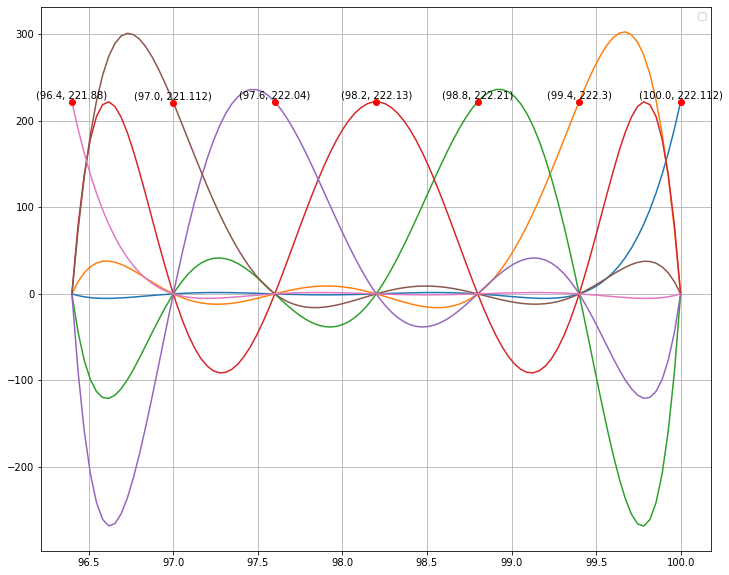

In [ ]:
L_0 = lambda x: v[0]*((x - 99.4)*(x - 98.8)*(x - 98.2)*(x - 97.6)*(x - 97.0)*(x - 96.4)/33.5923)
L_1 = lambda x: v[1]*((x - 100.0)*(x - 98.8)*(x - 98.2)*(x - 97.6)*(x - 97.0)*(x - 96.4)/-5.5986)
L_2 = lambda x: v[2]*((x - 100.0)*(x - 99.4)*(x - 98.2)*(x - 97.6)*(x - 97.0)*(x - 96.4)/2.2394)
L_3 = lambda x: v[3]*((x - 100.0)*(x - 99.4)*(x - 98.8)*(x - 97.6)*(x - 97.0)*(x - 96.4)/-1.6796)
L_4 = lambda x: v[4]*((x - 100.0)*(x - 99.4)*(x - 98.8)*(x - 98.2)*(x - 97.0)*(x - 96.4)/2.2394)
L_5 = lambda x: v[5]*((x - 100.0)*(x - 99.4)*(x - 98.8)*(x - 98.2)*(x - 97.6)*(x - 96.4)/-5.5987)
L_6 = lambda x: v[6]*((x - 100.0)*(x - 99.4)*(x - 98.8)*(x - 98.2)*(x - 97.6)*(x - 97.0)/33.5923)

polinomio_Laplace = lambda x: L_0(x) + L_1(x) + L_2(x) + L_3(x) + L_4(x) + L_5(x) + L_6(x)

#Gráfico
x = np.linspace(96.4, 100, 100)

fig, graf = plt.subplots(1, figsize = (12, 10))

graf.plot(x, L_0(x), temp[0], v[0], 'ro')
graf.annotate(f'{(np.round(temp[0], 3), (np.round(v[0], 3)))}', (temp[0], v[0]), textcoords="offset points", xytext=(0, 3), ha='center')

graf.plot(x, L_1(x), temp[1], v[1], 'ro')
graf.annotate(f'{(np.round(temp[1], 3), (np.round(v[1], 3)))}', (temp[1], v[1]), textcoords="offset points", xytext=(0, 3), ha='center')

graf.plot(x, L_2(x), temp[2], v[2], 'ro')
graf.annotate(f'{(np.round(temp[2], 3), (np.round(v[2], 3)))}', (temp[2], v[2]), textcoords="offset points", xytext=(0, 3), ha='center')

graf.plot(x, L_3(x), temp[3], v[3], 'ro')
graf.annotate(f'{(np.round(temp[3], 3), (np.round(v[3], 3)))}', (temp[3], v[3]), textcoords="offset points", xytext=(0, 3), ha='center')

graf.plot(x, L_4(x), temp[4], v[4], 'ro')
graf.annotate(f'{(np.round(temp[4], 3), (np.round(v[4], 3)))}', (temp[4], v[4]), textcoords="offset points", xytext=(0, 3), ha='center')

graf.plot(x, L_5(x), temp[5], v[5], 'ro')
graf.annotate(f'{(np.round(temp[5], 3), (np.round(v[5], 3)))}', (temp[5], v[5]), textcoords="offset points", xytext=(0, 3), ha='center')

graf.plot(x, L_6(x), temp[6], v[6], 'ro')
graf.annotate(f'{(np.round(temp[6], 3), (np.round(v[6], 3)))}', (temp[6], v[6]), textcoords="offset points", xytext=(0, 3), ha='center')

graf.legend()
graf.grid(True)

**Interpolação Polinomial - Método de Newton**

In [ ]:
aux1 = v[:]
aux2 = []
print(f"x = {temp}")
print(f"f(x) = {v}")
for i in range(1, len(v)):
  aux2 = aux1[:]
  aux1 = np.zeros(len(v))
  for j in range(len(v) - i):
    aux1[j] = np.round((aux2[j + 1] - aux2[j])/(temp[j + i] - temp[j]), 4) # aproximando em 4 casas decimais
  print(f"Δf{i} = {aux1}")

x = [100.   99.4  98.8  98.2  97.6  97.   96.4]
f(x) = [222.112 222.3   222.21  222.13  222.04  221.112 221.88 ]
Δf1 = [-0.3133  0.15    0.1333  0.15    1.5467 -1.28    0.    ]
Δf2 = [-0.3861  0.0139 -0.0139 -1.1639  2.3556  0.      0.    ]
Δf3 = [-0.2222  0.0154  0.6389 -1.9553  0.      0.      0.    ]
Δf4 = [-0.099  -0.2598  1.0809  0.      0.      0.      0.    ]
Δf5 = [ 0.0536 -0.4469  0.      0.      0.      0.      0.    ]
Δf6 = [0.139 0.    0.    0.    0.    0.    0.   ]


Com isso, temos que o polinômio para o Método de Newton é: 

\begin{align} 
  p(x) = 222.112 -0.3133(x − 100) -0.3861(x − 100)(x − 99.4) -0.2222(x − 100)(x − 99.4)(x − 98.8) -0.099(x − 100)(x − 99.4)(x − 98.8)(x − 98.2) + 0.0536(x − 100)(x − 99.4)(x − 98.8)(x − 98.2)(x − 97.6) + 0.1390(x − 100)(x − 99.4)(x − 98.8)(x − 98.2)(x − 97.6)(x − 97)\\
\end{align} 

Utilizando o polinômio de Newton para calcular uma aproximação da velocidade para uma temperatura de $98.5 °C$: 

In [ ]:
# Polinômio de Newton
polinomio_Newton =  lambda x : 222.112 - 0.3133*(x - 100) - 0.3861*(x - 100)*(x-99.4) - 0.2222*(x - 100)*(x - 99.4)*(x - 98.8) - 0.099*(x - 100)*(x - 99.4)*(x - 98.8)*(x - 98.2) + + 0.0536*(x - 100)*(x - 99.4)*(x - 98.8)*(x - 98.2)*(x - 97.6) + 0.1390*(x - 100)*(x - 99.4)*(x - 98.8)*(x - 98.2)*(x - 97.6)*(x - 97)

# Cálculo da velocidade para uma temperatura de 98.5°C:
print(f"Velocidade da particula para uma temperatura de 98.5 °C é de {np.round(polinomio_Newton(98.5), 4)} cm/s")

Velocidade da particula para uma temperatura de 98.5 °C é de 222.1341 cm/s


**Interpolação Polinomial - Método de Mínimos Quadrados** 

Com um método de Mínimos Quadrados, queremos encontrar a seguinte equação: 

\begin{align} 
  p(x) = a_1 \cdot x + a_2 \cdot x^2 + a_3 \cdot x^3 + a_4 \cdot x^4 + a_5 \cdot x^5 + a_6 \cdot x^6 \\
\end{align}

Para encontrar os coeficientes, iremos montar um sistema de equação para encontrar os valores de $a_1$, $a_2$, $a_3$, $a_4$, $a_5$ e $a_6$: 

In [ ]:
aux1 = np.zeros(len(v))
aux2 = np.zeros(len(v))
tam = 12
print(f"x = {temp} - Soma: {format(sum(temp),'.2E')}")
print(f"f(x) = {v} - Soma: {format(sum(v),'.2E')}")
print(f"f(x)*x = {temp*v} - Soma: {format(sum(temp*v),'.2E')}\n")
for i in range(1, tam):
  aux1 = np.zeros(len(v))
  aux2 = np.zeros(len(v))
  for j in range(len(v)):
    aux1[j] = temp[j]**(i+1)
    aux2[j] = aux1[j]*v[j]
  print(f"x^{i+1} = {aux1} - Soma: {format(sum(aux1),'.2E')}")
  if(i< tam/2): 
    print(f"f(x)*x^{i+1} = {aux1} - Soma: {format(sum(aux2),'.2E')}\n")

x = [100.   99.4  98.8  98.2  97.6  97.   96.4] - Soma: 6.87E+02
f(x) = [222.112 222.3   222.21  222.13  222.04  221.112 221.88 ] - Soma: 1.55E+03
f(x)*x = [22211.2   22096.62  21954.348 21813.166 21671.104 21447.864 21389.232] - Soma: 1.53E+05

x^2 = [10000.    9880.36  9761.44  9643.24  9525.76  9409.    9292.96] - Soma: 6.75E+04
f(x)*x^2 = [10000.    9880.36  9761.44  9643.24  9525.76  9409.    9292.96] - Soma: 1.50E+07

x^3 = [1000000.     982107.784  964430.272  946966.168  929714.176  912673.
  895841.344] - Soma: 6.63E+06
f(x)*x^3 = [1000000.     982107.784  964430.272  946966.168  929714.176  912673.
  895841.344] - Soma: 1.47E+09

x^4 = [1.00000000e+08 9.76215137e+07 9.52857109e+07 9.29920777e+07
 9.07401036e+07 8.85292810e+07 8.63591056e+07] - Soma: 6.52E+08
f(x)*x^4 = [1.00000000e+08 9.76215137e+07 9.52857109e+07 9.29920777e+07
 9.07401036e+07 8.85292810e+07 8.63591056e+07] - Soma: 1.45E+11

x^5 = [1.00000000e+10 9.70357846e+09 9.41422823e+09 9.13182203e+09
 8.85623411e+09 8

Assim, encontramos o seguinte sistema: 

$\begin{bmatrix}
6.75E+04 & 6.63E+06 & 6.52E+08 & 6.40E+10 & 6.29E+12 & 6.18E+14\\
6.63E+06 & 6.52E+08 & 6.40E+10 & 6.29E+12 & 6.18E+14 & 6.08E+16\\
6.52E+08 & 6.40E+10 & 6.29E+12 & 6.18E+14 & 6.08E+16 & 5.98E+18\\
6.40E+10 & 6.29E+12 & 6.18E+14 & 6.08E+16 & 5.98E+18 & 5.88E+20\\
6.29E+12 & 6.18E+14 & 6.08E+16 & 5.98E+18 & 5.88E+20 & 5.78E+22\\
6.18E+14 & 6.08E+16 & 5.98E+18 & 5.88E+20 & 5.78E+22 & 5.68E+24\\
\end{bmatrix}
\begin{bmatrix}
a_1 \\
a_2 \\
a_3 \\
a_4 \\
a_5 \\
a_6 \\
\end{bmatrix} 
=
\begin{bmatrix}
1.53 \cdot 10^5 \\
1.50 \cdot 10^7 \\
1.47 \cdot 10^9 \\
1.45 \cdot 10^{11} \\
1.42 \cdot 10^{13} \\
1.40 \cdot 10^{15} \\
\end{bmatrix}$

Para resolver esse sistema iremos utilizar o Método Interativo Gauss-Jacobi.

In [ ]:
# Definindo as matrizes: 
x = np.array([[6.75*10**(4), 6.63*10**(6), 6.52*10**(8), 6.40*10**(10), 6.29*10**(12), 6.18*10**(14)], [6.63*10**(6), 6.52*10**(8), 6.40*10**(10), 6.29*10**(12), 6.18*10**(14), 6.08*10**(16)], [6.52*10**(8), 6.40*10**(10), 6.29*10**(12), 6.18*10**(14), 6.08*10**(16), 5.98*10**(18)], [6.40*10**(10), 6.29*10**(12), 6.18*10**(14), 6.08*10**(16), 5.98*10**(18), 5.88*10**(20)], [6.29*10**(12), 6.18*10**(14), 6.08*10**(16), 5.98*10**(18), 5.88*10**(20), 5.78*10**(22)], [6.18*10**(14), 6.08*10**(16), 5.98*10**(18), 5.88*10**(20), 5.78*10**(22), 5.68*10**(24)]])
y = np.array([1.53*10**(5), 1.50*10**(7), 1.47*10**(9), 1.45*10**(11), 1.42*10**(13), 1.40*10**(15)])


In [ ]:
# Método Iterativo Gauss Jacobi
S = y
precisao = 10**(-4)
i = 0

while True:
  sol_anterior = S
  S = np.dot(x, S) + y
  print("Iteracao " f"{i}" " : " f"{S}") 

  teste1 = np.max(S - sol_anterior)/np.max(S) # Critério de Parada
  i += 1
  if(teste1 < precisao):
    break

PS.: professora, não conseguir concluir a parte dos métodos dos minimos quadraticos e não estou entendendo o erro que está dando nesse trecho. 

O grafico com os polinômios de Newton e de Laplace é apresentado a seguir. E observando a curva do polinômio de Newton e de Laplace, tem-se que elas apresentam o mesmo comportamento.

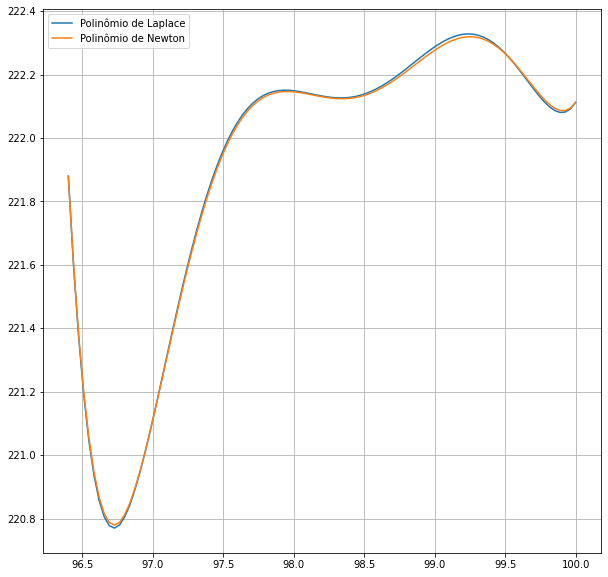

In [ ]:
fig, graf1 = plt.subplots(1, figsize = (10, 10))

graf1.plot(x, polinomio_Laplace(x), label = "Polinômio de Laplace")
graf1.plot(x, polinomio_Newton(x), label = "Polinômio de Newton")
graf1.legend()
graf1.grid(True)